<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/DataPreprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading the required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
import spacy
import torchtext
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.parsing.preprocessing import remove_stopwords

In [3]:
%%capture
%%bash
python -m spacy download en

### Loading data from google drive

In [4]:
article1 = pd.read_csv('drive/My Drive/Top-Ex/articles1.csv')
article2 = pd.read_csv('drive/My Drive/Top-Ex/articles2.csv')
article3 = pd.read_csv('drive/My Drive/Top-Ex/articles3.csv')

In [5]:
article1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [6]:
articles = pd.concat([article1,article2,article3], axis=0)
articles = articles.sample(n = 50000, random_state = 2)

In [7]:
del article1,article2,article3

In [8]:
articles = articles[['title','content']]

In [9]:
articles['text']= articles['title']+' '+articles['content']

In [10]:
articles.title.iloc[0]

'Trump says his ’massive’ tax plan is coming next week'

In [11]:
articles.content.iloc[0]

'’  ’ ’   President Donald Trump said that he expects to release his plan   for a tax overhaul on ”Wednesday or shortly thereafter,” in an   interview with the Associated Press on Wednesday. ’ ’   Trump told the AP that the plan would include a ”massive” tax cut   for corporations and businesses. ’ ’   During the campaign, Trump said that  to 15% from its   current 35% level. ’ ”   Since that time, however,  could be much higher   than that under Trump’s plan. ” ’   The statement comes just as hope for a quick resolution to   tax reform began to fade. The president  that he was going to   release something ”phenomenal in terms of tax” in ”two or three   weeks.” Additionally, Treasury Secretary Steven Mnuchin said that   he wanted  by the   congressional recess in August, but  ’ ’   In response to the news, stocks popped with the Dow Jones   industrial average jumping a little over 30 points to 20, 578   as of 2:23 p. m. ET. ’ ’President Donald Trump said that he expects to. ..’ ’’ ’’ ’

In [12]:
articles.text.iloc[0]

'Trump says his ’massive’ tax plan is coming next week ’  ’ ’   President Donald Trump said that he expects to release his plan   for a tax overhaul on ”Wednesday or shortly thereafter,” in an   interview with the Associated Press on Wednesday. ’ ’   Trump told the AP that the plan would include a ”massive” tax cut   for corporations and businesses. ’ ’   During the campaign, Trump said that  to 15% from its   current 35% level. ’ ”   Since that time, however,  could be much higher   than that under Trump’s plan. ” ’   The statement comes just as hope for a quick resolution to   tax reform began to fade. The president  that he was going to   release something ”phenomenal in terms of tax” in ”two or three   weeks.” Additionally, Treasury Secretary Steven Mnuchin said that   he wanted  by the   congressional recess in August, but  ’ ’   In response to the news, stocks popped with the Dow Jones   industrial average jumping a little over 30 points to 20, 578   as of 2:23 p. m. ET. ’ ’Presi

In [13]:
articles = articles[['text']]

# Performing Preprocessing steps

1. Lower Case Conversion
2. Removal of Stop Words
3. Removal of special characters and numbers
4. Lemmatization
5. Removal of Custom Stop Words
6. Removal of Proper Nouns

In [14]:
#lower
articles['cleanseText'] = articles.text.apply(lambda x: str(x).lower())
articles = articles[['cleanseText']]

In [15]:
def spacy_tokenizer_lemmatizer(text):
    
    nlp = spacy.load('en_core_web_sm')
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)    
    lemma_list = []
    for token in tokens:
        if token.is_stop is False:
            lemma_list.append(token.lemma_)
    
    return(lemma_list)

In [16]:
%%capture
articles['cleanseText'] = articles.cleanseText.apply(lambda x: x.lower())
articles['cleanseText'] = articles.cleanseText.apply(lambda x: remove_stopwords(x))

In [17]:
from tqdm import tqdm
import spacy
nlp = spacy.load("en_core_web_sm")

docs = articles.cleanseText.to_list()
articles['cleanseText2'] =''
i=0
for doc in tqdm(nlp.pipe(docs, batch_size=32, n_process=3, disable=["parser", "ner"])):
   articles['cleanseText2'].iloc[i] =  [tok.lemma_ for tok in doc]
   i=i+1

50000it [23:33, 35.37it/s]


In [18]:
#Removing special characters
articles['cleanseText'] = articles.cleanseText2.apply(lambda x: [w for w in x if w.isalnum()])
articles.head()

,cleanseText,cleanseText2
44480,"[trump, say, massive, tax, plan, come, week, p...","[trump, say, ', massive, ', tax, plan, come, w..."
8195,"[chicago, police, no, regard, minority, live, ...","[chicago, police, ', no, regard, ', minority, ..."
10464,"[concussion, lead, sleep, problem, year, peopl...","[concussion, lead, sleep, problem, year, peopl..."
19198,"[trump, joke, crude, comment, woman, watch, in...","[trump, :, joke, crude, comment, woman, ', -PR..."
17793,"[beyoncé, drop, coachella, duh, happen, friend...","[beyoncé, drop, coachella, ,, duh, ', happen, ..."


In [19]:
import pickle
output = open('drive/My Drive/Top-Ex/articles_cleansed.pkl', 'wb')
pickle.dump(articles, output)
output.close()

# pkl_file = open('drive/My Drive/Top-Ex/articles_cleansed.pkl', 'rb')
# mydict2 = pickle.load(pkl_file)
# pkl_file.close()

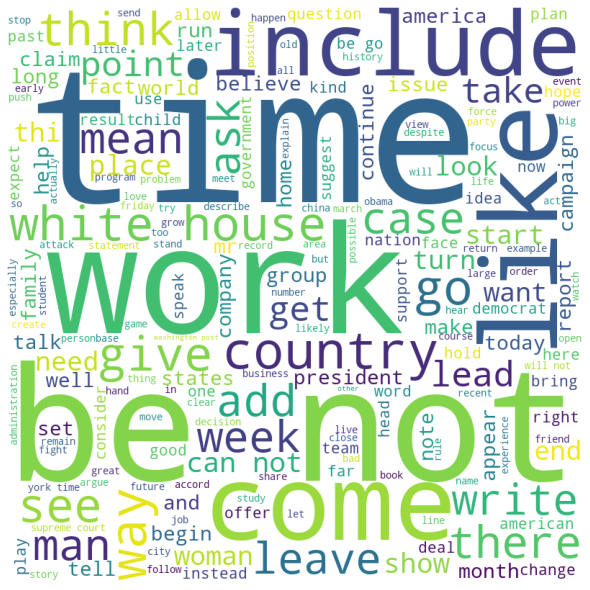

In [20]:

# Python program to generate WordCloud
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''

for tokens in articles.cleanseText:
  comment_words += " ".join(tokens)+" "

stopwords = ['know','donald','trump','call','new','say','hillary','clinton','do','united','state','the','day','news','that','have','however','year']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

### Test

In [ ]:
nlp = spacy.load('en_core_web_sm')
tokenizer = nlp.Defaults.create_tokenizer(nlp)  
articles['cleanseText'] = articles.cleanseText.apply(lambda x: tokenizer(x))

In [ ]:
from tqdm import tqdm
articles['cleanseText2'] = ''
for i in tqdm(range(articles.shape[0])):
  articles['cleanseText2'].iloc[i] = spacy_tokenizer_lemmatizer(articles['cleanseText'].iloc[i])

  0%|          | 212/142570 [02:43<31:18:51,  1.26it/s]

KeyboardInterrupt: ignored

In [ ]:
def cleanseTextNew(text):
  text = text.lower()
  text = remove_stopwords(text)
  text = ''.join(e for e in text if (e.isalnum() or e==' ' ))
  
  from spacy.lang.en.stop_words import STOP_WORDS
  filtered_sentence =[] 
  nlp = English()
  my_doc = nlp(text)
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word)
  return " ".join(word for word in filtered_sentence)

In [ ]:
# articles['cleanseText2'] = 
articles.cleanseText[0].apply(lambda x: spacy_tokenizer_lemmatizer(cleanseTextNew(x)))

0    [house, republicans, fret, win, health, care, ...
0    [patriot, day, well, dig, past, heroism, patri...
0    [alton, sterlings, son, need, protest, right, ...
Name: cleanseText, dtype: object

In [ ]:
#removing stopwords
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import remove_stopwords

remove_stopwords(articles.cleanseText.iloc[0])

In [ ]:
def stopWordsRemoval(tokensList):
  sp = spacy.load('en_core_web_sm')
  all_stopwords = spacy.lang.en.stop_words.STOP_WORDS
  return [word for word in tokensList if not word in all_stopwords]

In [ ]:
def sequentialCleansing(*cleansingFuncs):
    def func(txt_input):
        for cleansing in cleansingFuncs:
            txt_input = cleansing(txt_input)
        return txt_input
    return func

In [ ]:
textCleanse = sequentialCleansing()

In [ ]:
%%capture
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from spacy.lang.en import English
import re

def spacy_tokenizer_lemmatizer(text):
    
    nlp = spacy.load('en_core_web_sm')
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)    
    lemma_list = []
    for token in tokens:
        if token.is_stop is False:
            lemma_list.append(token.lemma_)
    
    return(lemma_list)

def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', '', text[i])
            temp_text = re.sub('[\W]+', '', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

spacy_estimators = [('tokenizer', pipelinize(spacy_tokenizer_lemmatizer)), ('preprocessor', pipelinize(preprocessor_final))]

In [ ]:
spacy_pipe = Pipeline(spacy_estimators)
spacy_pipe.transform(['This is random displaying example'])

[['random', 'display', 'example']]

In [ ]:
articles['cleanseText'] = articles.text.apply(lambda x: spacy_pipe.transform(x)) #running for longer time

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

remove_stopwords(articles.cleanseText.iloc[0])

In [ ]:
import nltk
nltk.download()

In [ ]:
def cleanseText(textInput):
  import nltk
  from nltk.corpus import stopwords
  from nltk.tokenize import word_tokenize 
  stop_words = set(stopwords.words('english')) 
  
  nlp = spacy.load('en_core_web_sm')
  tokenizer = nlp.Defaults.create_tokenizer(nlp)
  tokens = tokenizer(textInput)
  all_stopwords = spacy.lang.en.stop_words.STOP_WORDS
  wordsList = [word for word in tokens if not word in all_stopwords]
  wordsList2 = [word for word in tokens if not wordsList in stop_words]
  return [word.lemma_ for word in wordsList2]

In [ ]:
# sp = spacy.load('en_core_web_sm')
# text = sp(articles.cleanseText.iloc[0])
# for word in text:
#     print(word.text,  word.lemma_)
from gensim.parsing.preprocessing import remove_stopwords

remove_stopwords(articles.cleanseText.iloc[0])

'house republicans fret winning health care suit - new york times washington — congressional republicans new fear comes health care lawsuit obama administration: win. incoming trump administration choose longer defend executive branch suit, challenges administration’s authority spend billions dollars health insurance subsidies americans, handing house republicans big victory issues. sudden loss disputed subsidies conceivably cause health care program implode, leaving millions people access health insurance republicans prepared replacement. lead chaos insurance market spur political backlash republicans gain control government. stave outcome, republicans awkward position appropriating huge sums temporarily prop obama health care law, angering conservative voters demanding end law years. twist, donald j. trump’s administration, worried preserving executive branch prerogatives, choose fight republican allies house central questions dispute. eager avoid ugly political pileup, republicans c

In [ ]:
spacy_tokenizer_lemmatizer(articles.cleanseText.iloc[0])

['house',
 'republicans',
 'fret',
 'win',
 'health',
 'care',
 'suit',
 '-',
 'new',
 'york',
 'time',
 'washington',
 ' ',
 '—',
 '  ',
 'congressional',
 'republicans',
 'new',
 'fear',
 'come',
 '   ',
 'health',
 'care',
 'lawsuit',
 'obama',
 'administration',
 ':',
 'win',
 '.',
 'incoming',
 'trump',
 'administration',
 'choose',
 'long',
 'defend',
 'executive',
 'branch',
 'suit',
 ',',
 'challenge',
 'administration',
 'authority',
 'spend',
 'billion',
 'dollar',
 'health',
 'insurance',
 'subsidy',
 '  ',
 '  ',
 'americans',
 ',',
 'hand',
 'house',
 'republicans',
 'big',
 'victory',
 '   ',
 'issue',
 '.',
 'sudden',
 'loss',
 'dispute',
 'subsidy',
 'conceivably',
 'cause',
 'health',
 'care',
 'program',
 'implode',
 ',',
 'leave',
 'million',
 'people',
 'access',
 'health',
 'insurance',
 'republicans',
 'prepare',
 'replacement',
 '.',
 'lead',
 'chaos',
 'insurance',
 'market',
 'spur',
 'political',
 'backlash',
 'republicans',
 'gain',
 'control',
 'government',

In [ ]:
pkl_file = open('drive/My Drive/Top-Ex/articles_cleansed.pkl', 'rb')
mydict2 = pickle.load(pkl_file)
pkl_file.close()